# The Difference from previous file
This file is a copy of the previous file and the only changes here done are in encoding of the data which resulted into improved scores. Also, the encoders and models are saved for future deployment.

# Project Overview

In this project, we analyse different categorical and numerical features comtributing towards the price of a car and make an appropriate Machine Learning regression model to predict car prices.

# Initial Data Cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

train = pd.read_excel('Data_Train.xlsx')
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [2]:
#Dataset Cleaning 

print(train.isnull().sum())
print('Size of training data set: ',train.shape)

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64
Size of training data set:  (6019, 12)


In [3]:
# We have 6019 datapoints and very small number of NA values. 
# It's safe to drop these missing rows and it wont affect our model.

# Dropping all the NA values rows.
train.dropna(how='any', inplace=True) 

# Cleaning insignificant text from features.
train['Mileage'] = train['Mileage'].str.replace('km/kg','') 
train['Mileage'] = train.Mileage.str.replace('kmpl','')  
train['Engine'] = train.Engine.str.replace('CC','') 
train['Power'] = train['Power'].str.replace('bhp', '')

# Removing rows where 'Power' = 'null'
train['Power'] = train['Power'].str.strip()
train = train[train['Power'] != 'null']  

In [4]:
# Converting categorical data into numerical data
train['Power'] = train['Power'].astype(float) 
train['Mileage'] = train['Mileage'].astype(float) 
train['Engine'] = train['Engine'].astype(float)

train.head()
print(train.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [5]:
print('Current Dataset size: ', train.shape) 
print('Features: ', train.columns.values) 

# Extracting the brand name as a feature since it is the most relevant. 
brand = [] 
for name in train['Name'].str.split(): 
    brand.append(name[0]) 
train['Brand'] = brand 
train.head() 

Current Dataset size:  (5872, 12)
Features:  ['Name' 'Location' 'Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission'
 'Owner_Type' 'Mileage' 'Engine' 'Power' 'Seats' 'Price']


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [6]:
train.nunique()

Name                 1811
Location               11
Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               429
Engine                139
Power                 368
Seats                   8
Price                1364
Brand                  30
dtype: int64

In [7]:
# We need to convert categorical features into numerical values so that our models can interpret their contribution. 

train['Fuel_Type'] = train['Fuel_Type'].astype('category') 
train['Transmission'] = train['Transmission'].astype('category') 
train['Location'] = train['Location'].astype('category') 
train['Brand'] = train['Brand'].astype('category') 
train['Owner_Type'] = train['Owner_Type'].astype('category') 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5872 non-null   object  
 1   Location           5872 non-null   category
 2   Year               5872 non-null   int64   
 3   Kilometers_Driven  5872 non-null   int64   
 4   Fuel_Type          5872 non-null   category
 5   Transmission       5872 non-null   category
 6   Owner_Type         5872 non-null   category
 7   Mileage            5872 non-null   float64 
 8   Engine             5872 non-null   float64 
 9   Power              5872 non-null   float64 
 10  Seats              5872 non-null   float64 
 11  Price              5872 non-null   float64 
 12  Brand              5872 non-null   category
dtypes: category(5), float64(5), int64(2), object(1)
memory usage: 443.7+ KB


# Correlations, Plots and more Cleaning

In this segment, we try to observe independent correlations of our attributes with price.

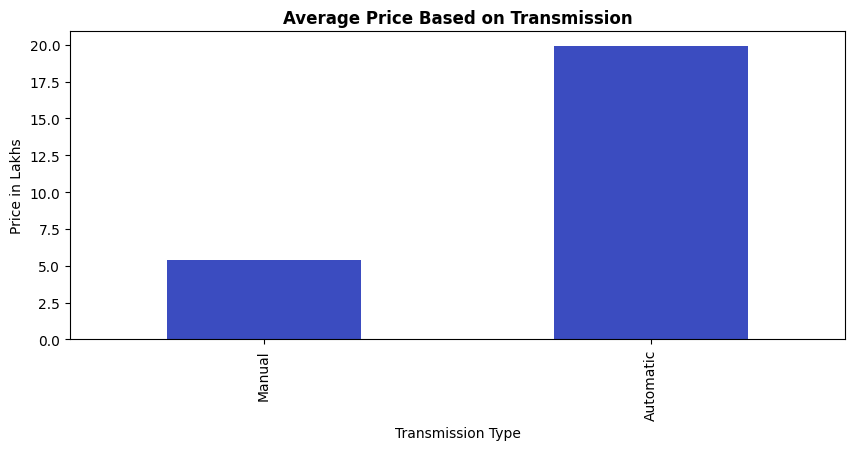

In [9]:
# Transmission vs Price

plt.figure(figsize=(10,4))
train.groupby('Transmission')['Price'].mean().sort_values().plot(kind='bar', colormap='coolwarm')
plt.title('Average Price Based on Transmission', fontweight='bold')
plt.xlabel('Transmission Type') 
plt.ylabel('Price in Lakhs') 
plt.show()

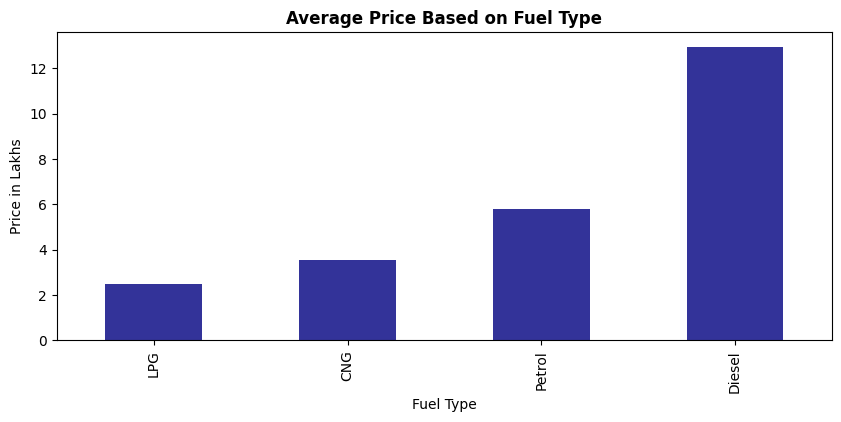

In [10]:
# Fuel Type vs Price

plt.figure(figsize=(10,4))
train.groupby('Fuel_Type')['Price'].mean().sort_values().plot(kind='bar', colormap='terrain')
plt.title('Average Price Based on Fuel Type', fontweight='bold')
plt.xlabel('Fuel Type') 
plt.ylabel('Price in Lakhs') 
plt.show()


We can observe here that there's an evident correlation between fuel type and price. 
**LPG<CNG<Petrol<Diesel**

Text(0, 0.5, 'Prices in Lakhs')

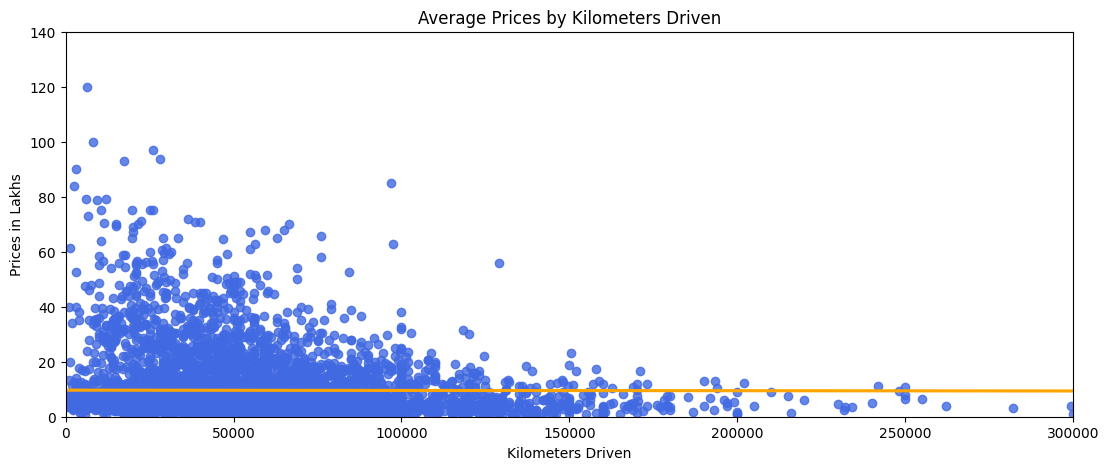

In [11]:
# Plotting Regression Plot of Kilometers Driven vs Price
import seaborn as sns
plt.figure(figsize=(13,5))
sns.regplot(x = 'Kilometers_Driven', y= 'Price', data= train, scatter_kws={'color' : "royalblue"}, 
            line_kws ={'color' : 'orange'}, ci=None)

plt.xlim(0, 300000)
plt.ylim(0, 140) 
plt.title('Average Prices by Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Prices in Lakhs')

The above shown regression line isn't visualized as we expect it to. This is probably because of an outlier data point very far apart from all other data points which is messing up our regression model. Let's get rid of that.

(0.0, 300000.0)

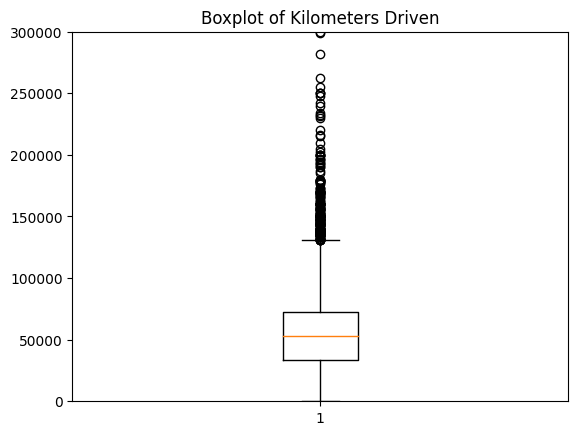

In [12]:
# Visualizing Outliers
plt.boxplot(train['Kilometers_Driven'])
plt.title("Boxplot of Kilometers Driven")
plt.ylim(0,300000)

In [13]:
# Removing Outliers
Q1 = train['Kilometers_Driven'].quantile(0.25)
Q3 = train['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

newtrain = train[(train['Kilometers_Driven'] >= lower_bound) & (train['Kilometers_Driven'] <=upper_bound) ]
print("No. of Outliers are ", train.shape[0] - newtrain.shape[0] , "out of ", train.shape[0], "points")

# Since the outliers are very less in terms of total datapoints, we can remove them.
train = newtrain

No. of Outliers are  199 out of  5872 points


Text(0, 0.5, 'Prices in Lakhs')

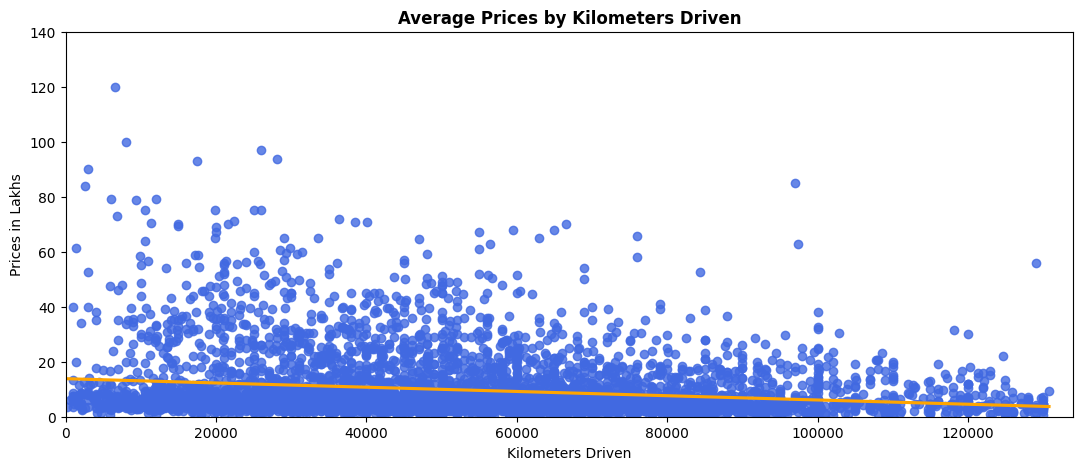

In [14]:
# Plotting Regression Plot of Kilometers Driven vs Price
plt.figure(figsize=(13,5))
sns.regplot(x = 'Kilometers_Driven', y= 'Price', data= train, scatter_kws={'color' : "royalblue"}, 
            line_kws ={'color' : 'orange'}, ci=None)

plt.xlim(0, 134000)
plt.ylim(0, 140) 
plt.title('Average Prices by Kilometers Driven', fontweight = 'bold')
plt.xlabel('Kilometers Driven')
plt.ylabel('Prices in Lakhs')

We can see a very small trend here wherein Km increase leads to price decrease. Not a big contributor though!

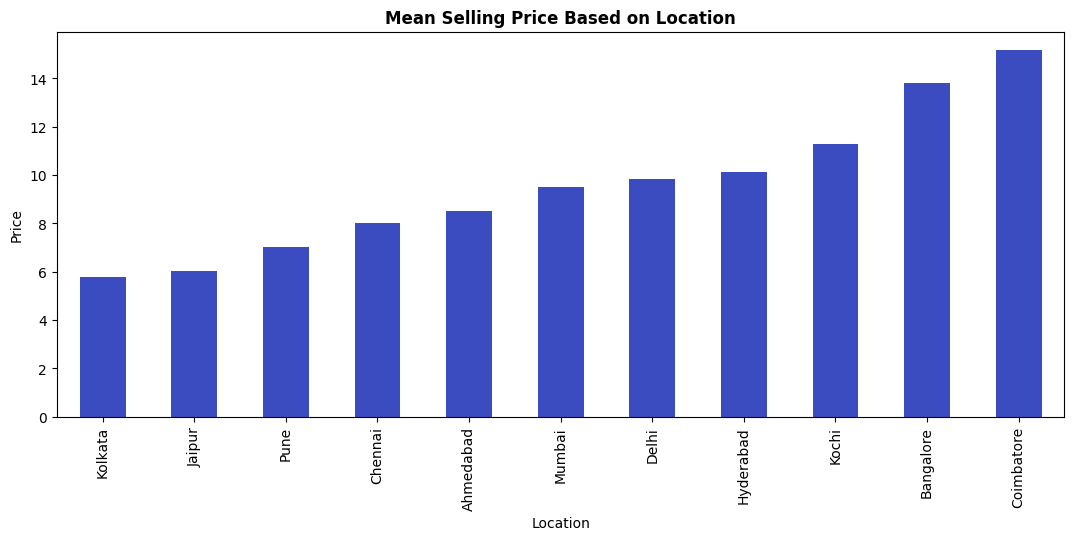

In [15]:
# Location vs Price 
plt.figure(figsize=(13,5))
train.groupby('Location')['Price'].mean().sort_values().plot(kind='bar', colormap='coolwarm') 
plt.ylabel('Price') 
plt.title('Mean Selling Price Based on Location', fontweight = 'bold')
plt.show()

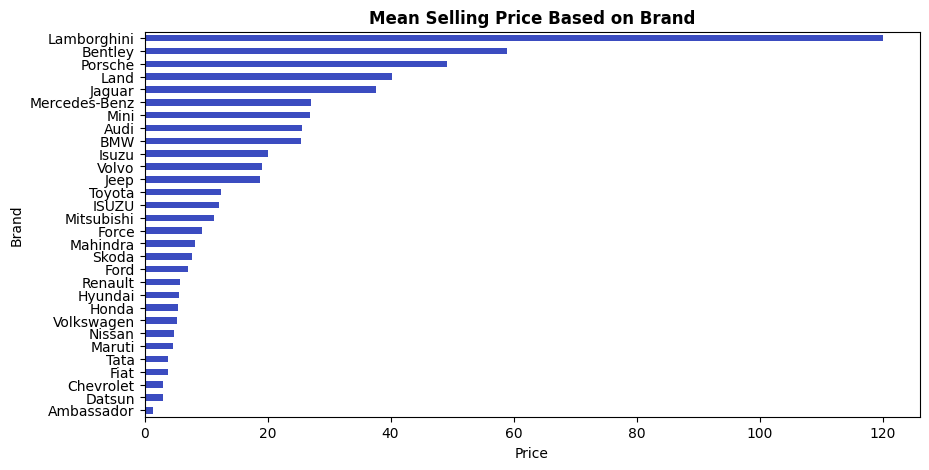

In [16]:
# Brand vs Price

plt.figure(figsize=(10,5))

train.groupby('Brand')['Price'].mean().sort_values().plot(kind='barh', colormap='coolwarm') 
plt.xlabel('Price') 
plt.title('Mean Selling Price Based on Brand', fontweight = 'bold')
plt.show()

Lamborghini is leading the price charts significantly, followed by Bentley and Porsche

Text(0.5, 1.0, 'BoxPlots of all Brands with respect to Price')

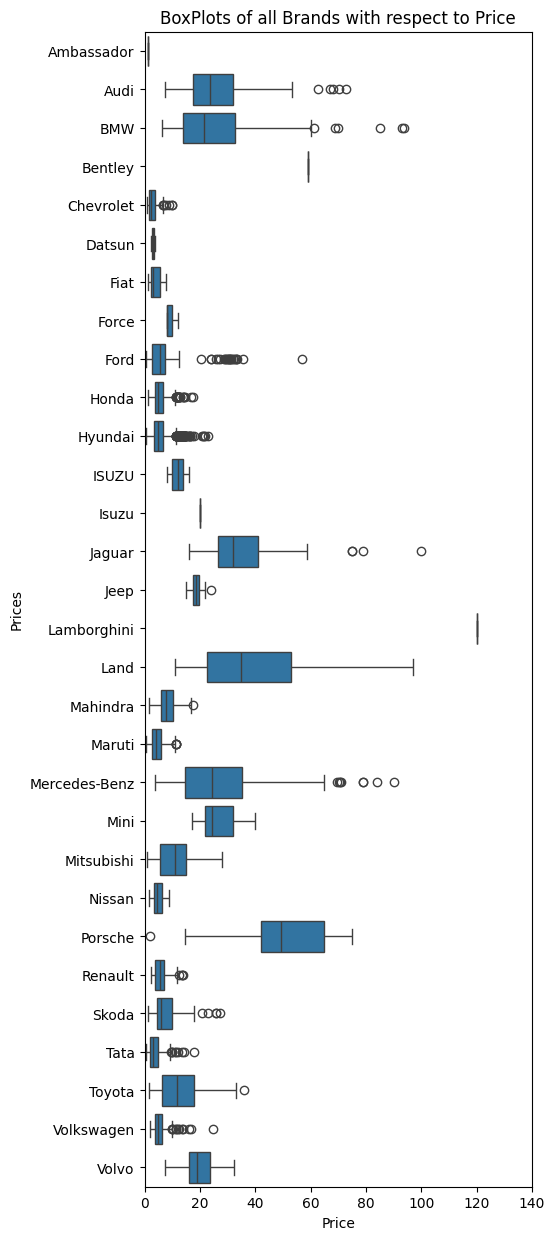

In [17]:
# Outliers in Brand's Prices 
# Making Horizontal BoxPlot due to Multiple Brand Values 

plt.figure(figsize = (5,15)) 
sns.boxplot(y= 'Brand', x = 'Price', data = train) 
plt.ylabel('Prices') 
plt.xlim(0,140) 
plt.title("BoxPlots of all Brands with respect to Price") 

From the above graph we can see that most of the companies work in a certain price range and thus have their upper and lower whisker very close to each other. There are exceptions like Mercedes which has a bigger price range in it's cars which means it sells both high end and average priced cars. 

Companies like Lamborghini are not even visible in this graph because the prices of it is so high that only its lower whisker is visible in the graph!

Since outliers are representative of a brand, maybe we should not get rid of it? 

In [18]:
def non_outliers(feature, df):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)

    iqr = q3-q1    
    lower_whisker = q1 - 1.5*(iqr)
    upper_whisker = q3 + 1.5*(iqr)
    
    return  df[(df[feature] <= upper_whisker) & (df[feature] >= lower_whisker)]

def count_outliers(feature, df):
    newdf = non_outliers(feature, df)
    return (df.shape[0] - newdf.shape[0])

def remove_outliers(feature, df):
    return non_outliers(feature,df)

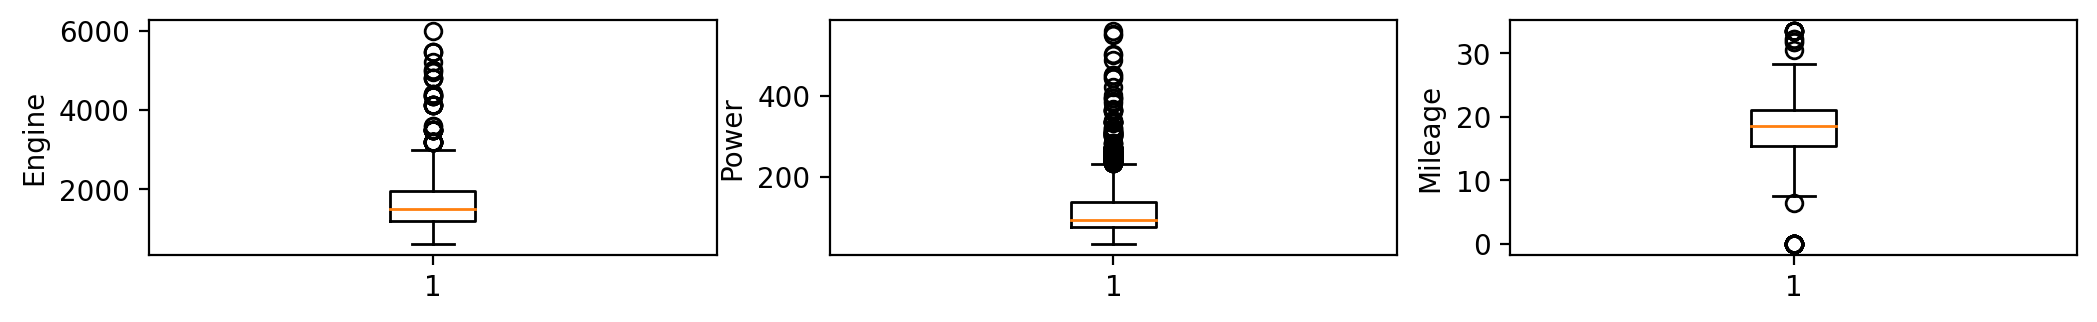

No. of Outliers in Engine are  57
No. of Outliers in Power are  235
No. of Outliers in Mileage are  42


In [19]:
# Visualizing and Removing Outliers 

# ----ENGINE----

plt.figure(figsize=(30,7), dpi = 200) 

plt.subplot(4,7,1) 
plt.boxplot(train['Engine']) 
plt.ylabel('Engine') 

# ----POWER----

plt.subplot(4,7,2) 
plt.boxplot(train['Power']) 
plt.ylabel('Power') 

# ----Mileage----

plt.subplot(4,7,3) 
plt.boxplot(train['Mileage']) 
plt.ylabel('Mileage') 
plt.show()

# Printing Outliers in each feature
print("No. of Outliers in Engine are ",count_outliers('Engine', train))
print("No. of Outliers in Power are ",count_outliers('Power', train)) 
print("No. of Outliers in Mileage are ",count_outliers('Mileage', train))

# Removing outliers
train = remove_outliers('Engine', train) 
train = remove_outliers('Power',train) 
train = remove_outliers('Mileage', train) 


Text(0, 0.5, 'Prices in Lakhs')

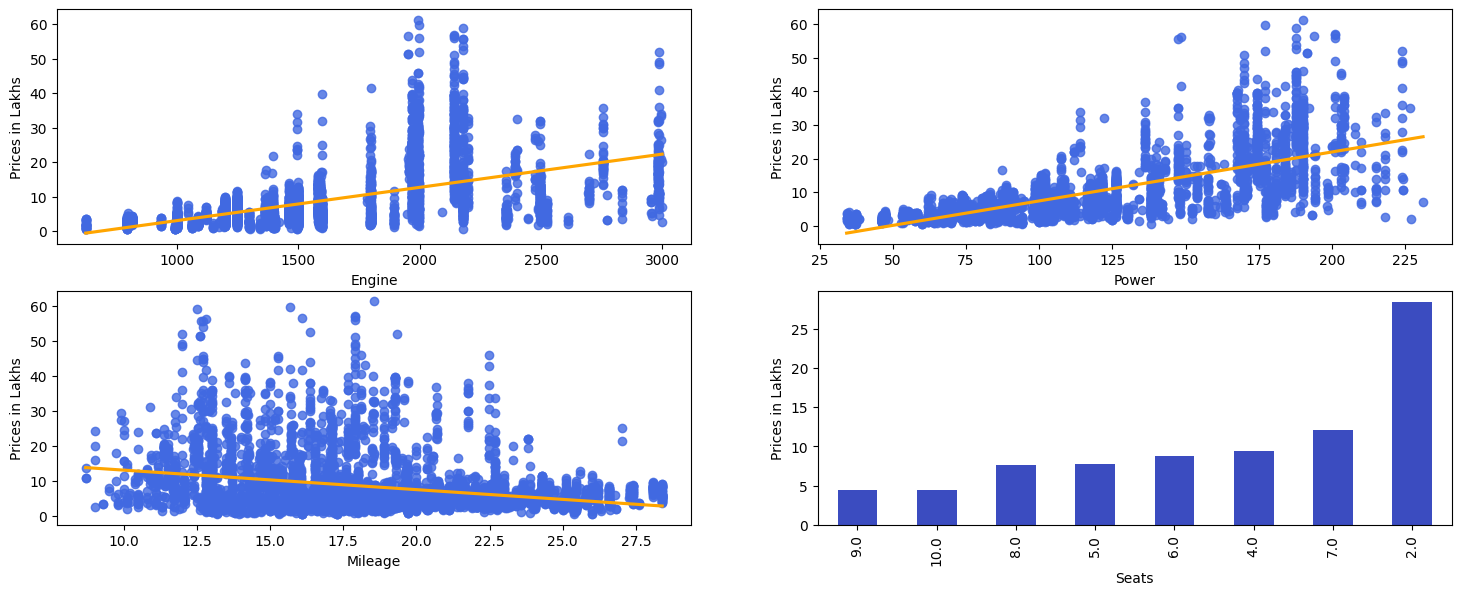

In [20]:
plt.figure(figsize=(18,14), dpi=100) 

# -----Engine------
plt.subplot(4,2,1)
sns.regplot(x= 'Engine', y= 'Price', data = train, scatter_kws= {'color': 'royalblue'},
            line_kws = {'color': 'orange'}, ci=None) 
plt.xlabel('Engine') 
plt.ylabel('Prices in Lakhs') 

# -----Power------
plt.subplot(4,2,2)
sns.regplot(x= 'Power', y= 'Price', data = train, scatter_kws= {'color': 'royalblue'},
            line_kws = {'color': 'orange'}, ci=None) 
plt.xlabel('Power')
plt.ylabel('Prices in Lakhs')

# -----Mileage------
plt.subplot(4,2,3)
sns.regplot(x= 'Mileage', y= 'Price', data = train, scatter_kws= {'color': 'royalblue'},
            line_kws = {'color': 'orange'}, ci=None) 
plt.xlabel('Mileage') 
plt.ylabel('Prices in Lakhs') 

# -----Seats------
plt.subplot(4,2,4)
train.groupby('Seats')['Price'].mean().sort_values().plot(kind = 'bar', colormap = 'coolwarm')
plt.xlabel('Seats') 
plt.ylabel('Prices in Lakhs')

# MACHINE LEARNING MODEL IMPLEMENTATIONS

Below, we are using different models and testing out their accuracies with the testing data set. 

### Multiple Regression OLS Model / Linear Regression

In [21]:
df = train
df.head() 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


We will encode the values of certain features in a sorted order of price by OrdinalEncoder which would be best for applying LinearRegression model.


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder

In [23]:
loc_order = df.groupby('Location')['Price'].mean().sort_values().index.to_list()
fuel_order = df.groupby('Fuel_Type')['Price'].mean().sort_values().index.to_list()
owner_order = df.groupby('Owner_Type')['Price'].mean().sort_values().index.to_list()
brand_order = df.groupby('Brand')['Price'].mean().sort_values().index.to_list()

In [24]:
total_columns = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 
'Engine', 'Power', 'Seats', 'Price']

loc_encoder = OrdinalEncoder(categories = [loc_order], handle_unknown = 'use_encoded_value', unknown_value = -1)
df['Location_cat'] = loc_encoder.fit_transform(df[['Location']])

fuel_encoder = OrdinalEncoder(categories = [fuel_order], handle_unknown = 'use_encoded_value', unknown_value = -1)
df['Fuel_Type_cat'] = fuel_encoder.fit_transform(df[['Fuel_Type']])

owner_encoder = OrdinalEncoder(categories = [owner_order], handle_unknown = 'use_encoded_value', unknown_value = -1)
df['Owner_Type_cat'] = owner_encoder.fit_transform(df[['Owner_Type']])

brand_encoder = OrdinalEncoder(categories = [brand_order], handle_unknown = 'use_encoded_value', unknown_value = -1)
df['Brand_cat'] = brand_encoder.fit_transform(df[['Brand']])

transmission_encoder = LabelEncoder()
df['Transmission_cat'] = transmission_encoder.fit_transform(df[['Transmission']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Location_cat,Fuel_Type_cat,Owner_Type_cat,Brand_cat,Transmission_cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,5.0,1.0,3.0,5.0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2.0,3.0,3.0,9.0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,3.0,2.0,3.0,8.0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,3.0,3.0,3.0,5.0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,10.0,3.0,2.0,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,6.0,3.0,3.0,5.0,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,1.0,3.0,3.0,9.0,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,1.0,3.0,2.0,13.0,1
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,0.0,2.0,3.0,5.0,1


In [26]:
# Shuffling our data set

df = df.sample(frac = 1).reset_index(drop=True) 
#frac=1 means shuffling 100% of the rows, reset index means the index of the original data isnt preserved, 
# drop = True means the index wont be created as new column.
df.head() 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Location_cat,Fuel_Type_cat,Owner_Type_cat,Brand_cat,Transmission_cat
0,Ford Fiesta Classic 1.4 Duratorq CLXI,Kochi,2012,79985,Diesel,Manual,First,17.80,1399.0,67.0,5.0,3.16,Ford,8.0,3.0,3.0,10.0,1
1,Mercedes-Benz S-Class 320 L,Coimbatore,2007,84143,Petrol,Manual,First,13.00,2987.0,210.0,5.0,17.09,Mercedes-Benz,10.0,2.0,3.0,23.0,1
2,Mahindra Scorpio 1.99 S10 4WD,Kochi,2016,56739,Diesel,Manual,First,15.40,1997.0,120.0,7.0,10.31,Mahindra,8.0,3.0,3.0,13.0,1
3,Toyota Corolla Altis 2008-2013 1.8 VL AT,Kochi,2016,41617,Petrol,Automatic,First,14.53,1794.0,138.1,5.0,14.14,Toyota,8.0,2.0,3.0,17.0,0
4,BMW 3 Series 320d Sport Line,Pune,2018,24000,Diesel,Automatic,First,18.88,1995.0,184.0,5.0,28.00,BMW,2.0,3.0,3.0,21.0,0


In [27]:
# Setting X and Y for model

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

X = df[['Location_cat', 'Fuel_Type_cat', 'Transmission_cat','Owner_Type_cat', 'Brand_cat', 'Year', 'Engine', 
        'Power','Seats', 'Mileage']]
Y = df.Price

X.head()

,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year,Engine,Power,Seats,Mileage
0,8.0,3.0,1,3.0,10.0,2012,1399.0,67.0,5.0,17.80
1,10.0,2.0,1,3.0,23.0,2007,2987.0,210.0,5.0,13.00
2,8.0,3.0,1,3.0,13.0,2016,1997.0,120.0,7.0,15.40
3,8.0,2.0,0,3.0,17.0,2016,1794.0,138.1,5.0,14.53
4,2.0,3.0,0,3.0,21.0,2018,1995.0,184.0,5.0,18.88


#### Using Train Test Split

In [28]:
# Splitting training and testing data 
# Train Test Split

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=37) 
print(X_train.shape, Y_train.shape) 
print(X_test.shape, Y_test.shape)


(4308, 10) (4308,)
(1077, 10) (1077,)


In [29]:
# Scaling continuous features (No scaling for categorical variables)
scale = StandardScaler()
from sklearn.linear_model import LinearRegression 

X_train[['Engine', 'Power', 'Mileage', 'Year']] = scale.fit_transform(X_train[['Engine', 'Power', 'Mileage', 'Year']])
model = LinearRegression()
model.fit(X_train, Y_train)

X_test[['Engine', 'Power', 'Mileage', 'Year']] = scale.transform(X_test[['Engine', 'Power', 'Mileage', 'Year']])
y_predicted = model.predict(X_test)


In [30]:
# R2 value for y_test and y_predictions
from sklearn.metrics import r2_score 

r2 = r2_score(Y_test, y_predicted) 
print(r2)

0.7546139833718685


#### Using K Folds Cross Validation

Cross Validation Scores:  [0.77426504 0.76611167 0.75108727 0.73437095 0.77669625 0.71059958
 0.7568078  0.70320137 0.76771265 0.75963143] 

Cross Predicted Accuracy:  0.7496544892118082
Root Mean squared error:  4.020608150694304


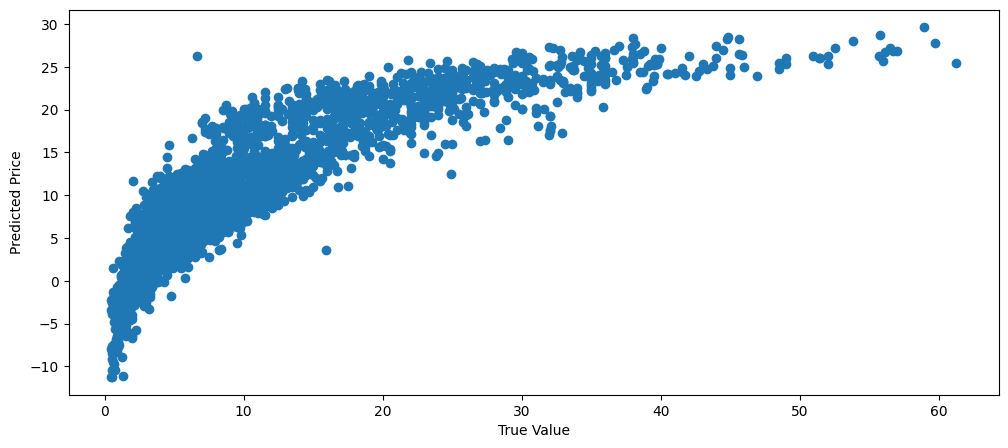

In [31]:
# ---------Fitting Model and Training K-1 subsets------------

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()
model = lm.fit(X,Y) 

scores = cross_val_score(model, X, Y, cv=10)  # K = 5 Folds
print("Cross Validation Scores: ", scores, '\n') 

# ---------Predicting Price with K Folds Validation------------ 

predictions = cross_val_predict(model, X,Y, cv=10) 
accuracy = r2_score(Y, predictions) 

mean_error = mean_squared_error(Y, predictions)

print("Cross Predicted Accuracy: ", accuracy)
print("Root Mean squared error: ",(mean_error)**(0.5))
plt.figure(figsize=(12,5))
plt.scatter(Y, predictions) 
plt.ylabel('Predicted Price') 
plt.xlabel('True Value')
plt.show()

Our Multiple Regression Model predicted negative prices as well. Seeing as that is probably not a good model, we decided to use Random Forest Regressor which does a much better job!

### Random Forest Model

#### Using Train Test Split

In [32]:
from sklearn.ensemble import RandomForestRegressor 

RFModel = RandomForestRegressor(random_state = 30) 
RFModel.fit(X_train, Y_train)

RandomForestRegressor(random_state=30)

In [33]:
y_predicted = RFModel.predict(X_test)
y_predicted

array([32.34943333,  1.94009048,  4.13      , ...,  4.07618333,
        2.661075  ,  3.35346667])

In [34]:
r2 = r2_score(Y_test, y_predicted)
r2 

0.9228592982808913

#### Using K Folds Cross Validation

In [35]:
# ---------Fitting Model and Training K-1 subsets------------
model = RandomForestRegressor() 

scores = cross_val_score(model, X, Y, cv=10)  # K = 10 Folds
print("Cross Validation Scores: ", scores*100, '\n') 

# ---------Predicting Price with K Folds Validation------------

predictions = cross_val_predict(model, X,Y, cv=10) 
accuracy = r2_score(Y, predictions) 

Cross Validation Scores:  [94.65763175 93.18581014 93.46167746 94.07677039 92.94048005 93.95817122
 90.6174886  92.64975686 95.30123847 94.71434237] 



Cross Predicted Accuracy:  93.59191333974614


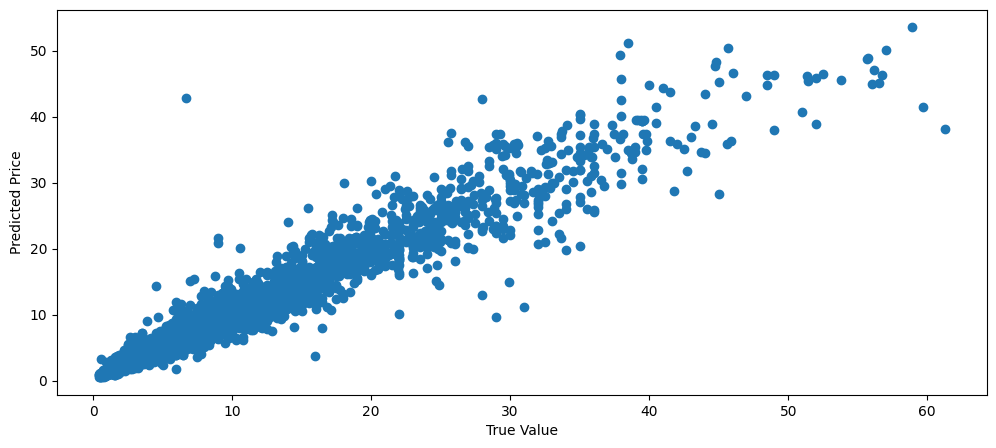

In [36]:
print("Cross Predicted Accuracy: ", accuracy*100) 
plt.figure(figsize=(12,5)) 
plt.scatter(Y, predictions) 
plt.ylabel('Predicted Price') 
plt.xlabel('True Value') 
plt.show()

From the above graph, we can say that our model is pretty accurate for lower-mid range priced vehicles. As the price tends to go higher, the predictions start going a little off. 

# Price Predictions for Test_Data 

Here, we predict prices in the Data_Test.xlsx. Since we arent given the prices of our Testing Data, only the predicted prices are presented. 

In [37]:
test_df = pd.read_excel('Data_Test.xlsx') 
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [38]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB
None


In [39]:
# Converting Dataset into usable form 
pd.options.mode.chained_assignment = None 

test_df.dropna(how='any', inplace=True)
test_df['Mileage'] = test_df.Mileage.str.replace('km/kg','')
test_df['Mileage'] = test_df.Mileage.str.replace('kmpl','') 
test_df['Engine'] = test_df.Engine.str.replace('CC','') 
test_df['Power'] = test_df['Power'].str.replace('bhp', '')
test_df['Power'] = test_df['Power'].str.strip() 

test_df = test_df[test_df['Power'] != 'null'] 
test_df['Power'] = test_df['Power'].astype(float) 
test_df['Mileage'] = test_df['Mileage'].astype(float) 
test_df['Engine'] = test_df['Engine'].astype(float)

brand = [] 
for name in test_df['Name'].str.split():
    brand.append(name[0]) 
test_df['Brand'] = brand 

test_df['Fuel_Type'] = test_df['Fuel_Type'].astype('category')  
test_df['Transmission'] = test_df['Transmission'].astype('category') 
test_df['Location'] = test_df['Location'].astype('category') 
test_df['Brand'] = test_df['Brand'].astype('category') 
test_df['Owner_Type'] = test_df['Owner_Type'].astype('category') 
 
test_df['Location_cat'] = loc_encoder.transform(test_df[['Location']])
test_df['Fuel_Type_cat'] = fuel_encoder.transform(test_df[['Fuel_Type']])
test_df['Transmission_cat'] = transmission_encoder.transform(test_df[['Transmission']])
test_df['Brand_cat'] = brand_encoder.transform(test_df[['Brand']])
test_df['Owner_Type_cat'] = owner_encoder.transform(test_df[['Owner_Type']])

test_df[['Engine', 'Power', 'Mileage', 'Year']] = scale.transform(test_df[['Engine', 'Power', 'Mileage', 'Year']])

test_df.head() 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Location_cat,Fuel_Type_cat,Transmission_cat,Brand_cat,Owner_Type_cat
0,Maruti Alto K10 LXI CNG,Delhi,0.136115,40929,CNG,Manual,First,3.429156,-1.119649,-1.176750,4.0,Maruti,6.0,1.0,1,5.0,3.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,-0.186251,54493,Petrol,Manual,Second,1.520418,-1.539831,-1.447168,5.0,Maruti,10.0,2.0,1,5.0,2.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,1.103214,34000,Diesel,Manual,First,-1.261897,1.782104,1.046140,7.0,Toyota,5.0,3.0,1,17.0,3.0
4,Hyundai i20 Magna,Mumbai,0.136115,29000,Petrol,Manual,First,-0.044950,-0.705707,-0.565207,5.0,Hyundai,5.0,2.0,1,9.0,3.0
5,Mahindra XUV500 W8 2WD,Coimbatore,0.780848,85609,Diesel,Manual,Second,-0.676146,1.336960,0.852629,7.0,Mahindra,10.0,3.0,1,13.0,2.0


In [40]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               1201 non-null   object  
 1   Location           1201 non-null   category
 2   Year               1201 non-null   float64 
 3   Kilometers_Driven  1201 non-null   int64   
 4   Fuel_Type          1201 non-null   category
 5   Transmission       1201 non-null   category
 6   Owner_Type         1201 non-null   category
 7   Mileage            1201 non-null   float64 
 8   Engine             1201 non-null   float64 
 9   Power              1201 non-null   float64 
 10  Seats              1201 non-null   float64 
 11  Brand              1201 non-null   category
 12  Location_cat       1201 non-null   float64 
 13  Fuel_Type_cat      1201 non-null   float64 
 14  Transmission_cat   1201 non-null   int64   
 15  Brand_cat          1201 non-null   float64 
 16  Owner_

In [41]:
X = test_df[['Location_cat', 'Fuel_Type_cat', 'Transmission_cat', 'Owner_Type_cat', 'Brand_cat', 'Year', 'Engine', 'Power', 'Seats','Mileage']]

test_predictions = RFModel.predict(X) 
print(test_predictions) 

[ 2.952525    2.8836     17.47135    ...  2.76484167  4.5087
 22.76702409]


Hopefully these predictions are very close to the real prices! 

In [43]:
# Saving our Encoders and Model for deployment purpose:
import joblib
joblib.dump(loc_encoder, '/savedmodels/loc_encoder.joblib')
joblib.dump(fuel_encoder, '/savedmodels/fuel_encoder.joblib')
joblib.dump(owner_encoder, '/savedmodels/owner_encoder.joblib')
joblib.dump(brand_encoder, '/savedmodels/brand_encoder.joblib')
joblib.dump(scale, '/savedmodels/scale.joblib') 
joblib.dump(RFModel, '/savedmodels/model.joblib') 
joblib.dump(transmission_encoder, '/savedmodels/transmission_encoder.joblib')

['transmission_encoder.joblib']

# End Of Project 

This marks the end of this project. A small summary of the process we went through: 

--> Imported and cleaned dataset. 
--> Did the Data Analysis, Cleaning and Preprocessing of the data available to check correlation of individual features with price and make some conclusions. 
--> Did Data Visualization of correlations of features with price by Plotting Graphs.
--> Used Multiple Regression Model first on our dataset. The model wasn't perfect and we faced negative price predictions. Solution?  We decided to go with a Random Forest Regressor instead. This model did a much better job and had an R2 score of 92% 

--> Used Train_Test_Split to cross validate. We also used KFolds to get rid of any inaccuracies in obtaining accuracy score. 